In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import rasterio
import rasterio.mask
import fiona
import string
import matplotlib.lines as mlines

from matplotlib_scalebar.scalebar import ScaleBar

In [3]:
mpl.rcParams["figure.dpi"] = 300

In [4]:
lst98 = rasterio.open("data/tiff/lstMedian1998.tif").read(1)
lst08 = rasterio.open("data/tiff/lstMedian2008.tif").read(1)
lst18 = rasterio.open("data/tiff/lstMedian2018.tif").read(1)

In [5]:
src = rasterio.open("data/tiff/lstMedian1998.tif")

In [6]:
with fiona.open("data/lausanne_reproj.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [7]:
out = rasterio.mask.raster_geometry_mask(src, shapes)

In [8]:
lst98 -= 273.15
lst08 -= 273.15
lst18 -= 273.15

In [9]:
vmin = np.min(lst98)
vmax = np.max(lst98)

In [10]:
years = [1998, 2008, 2018]

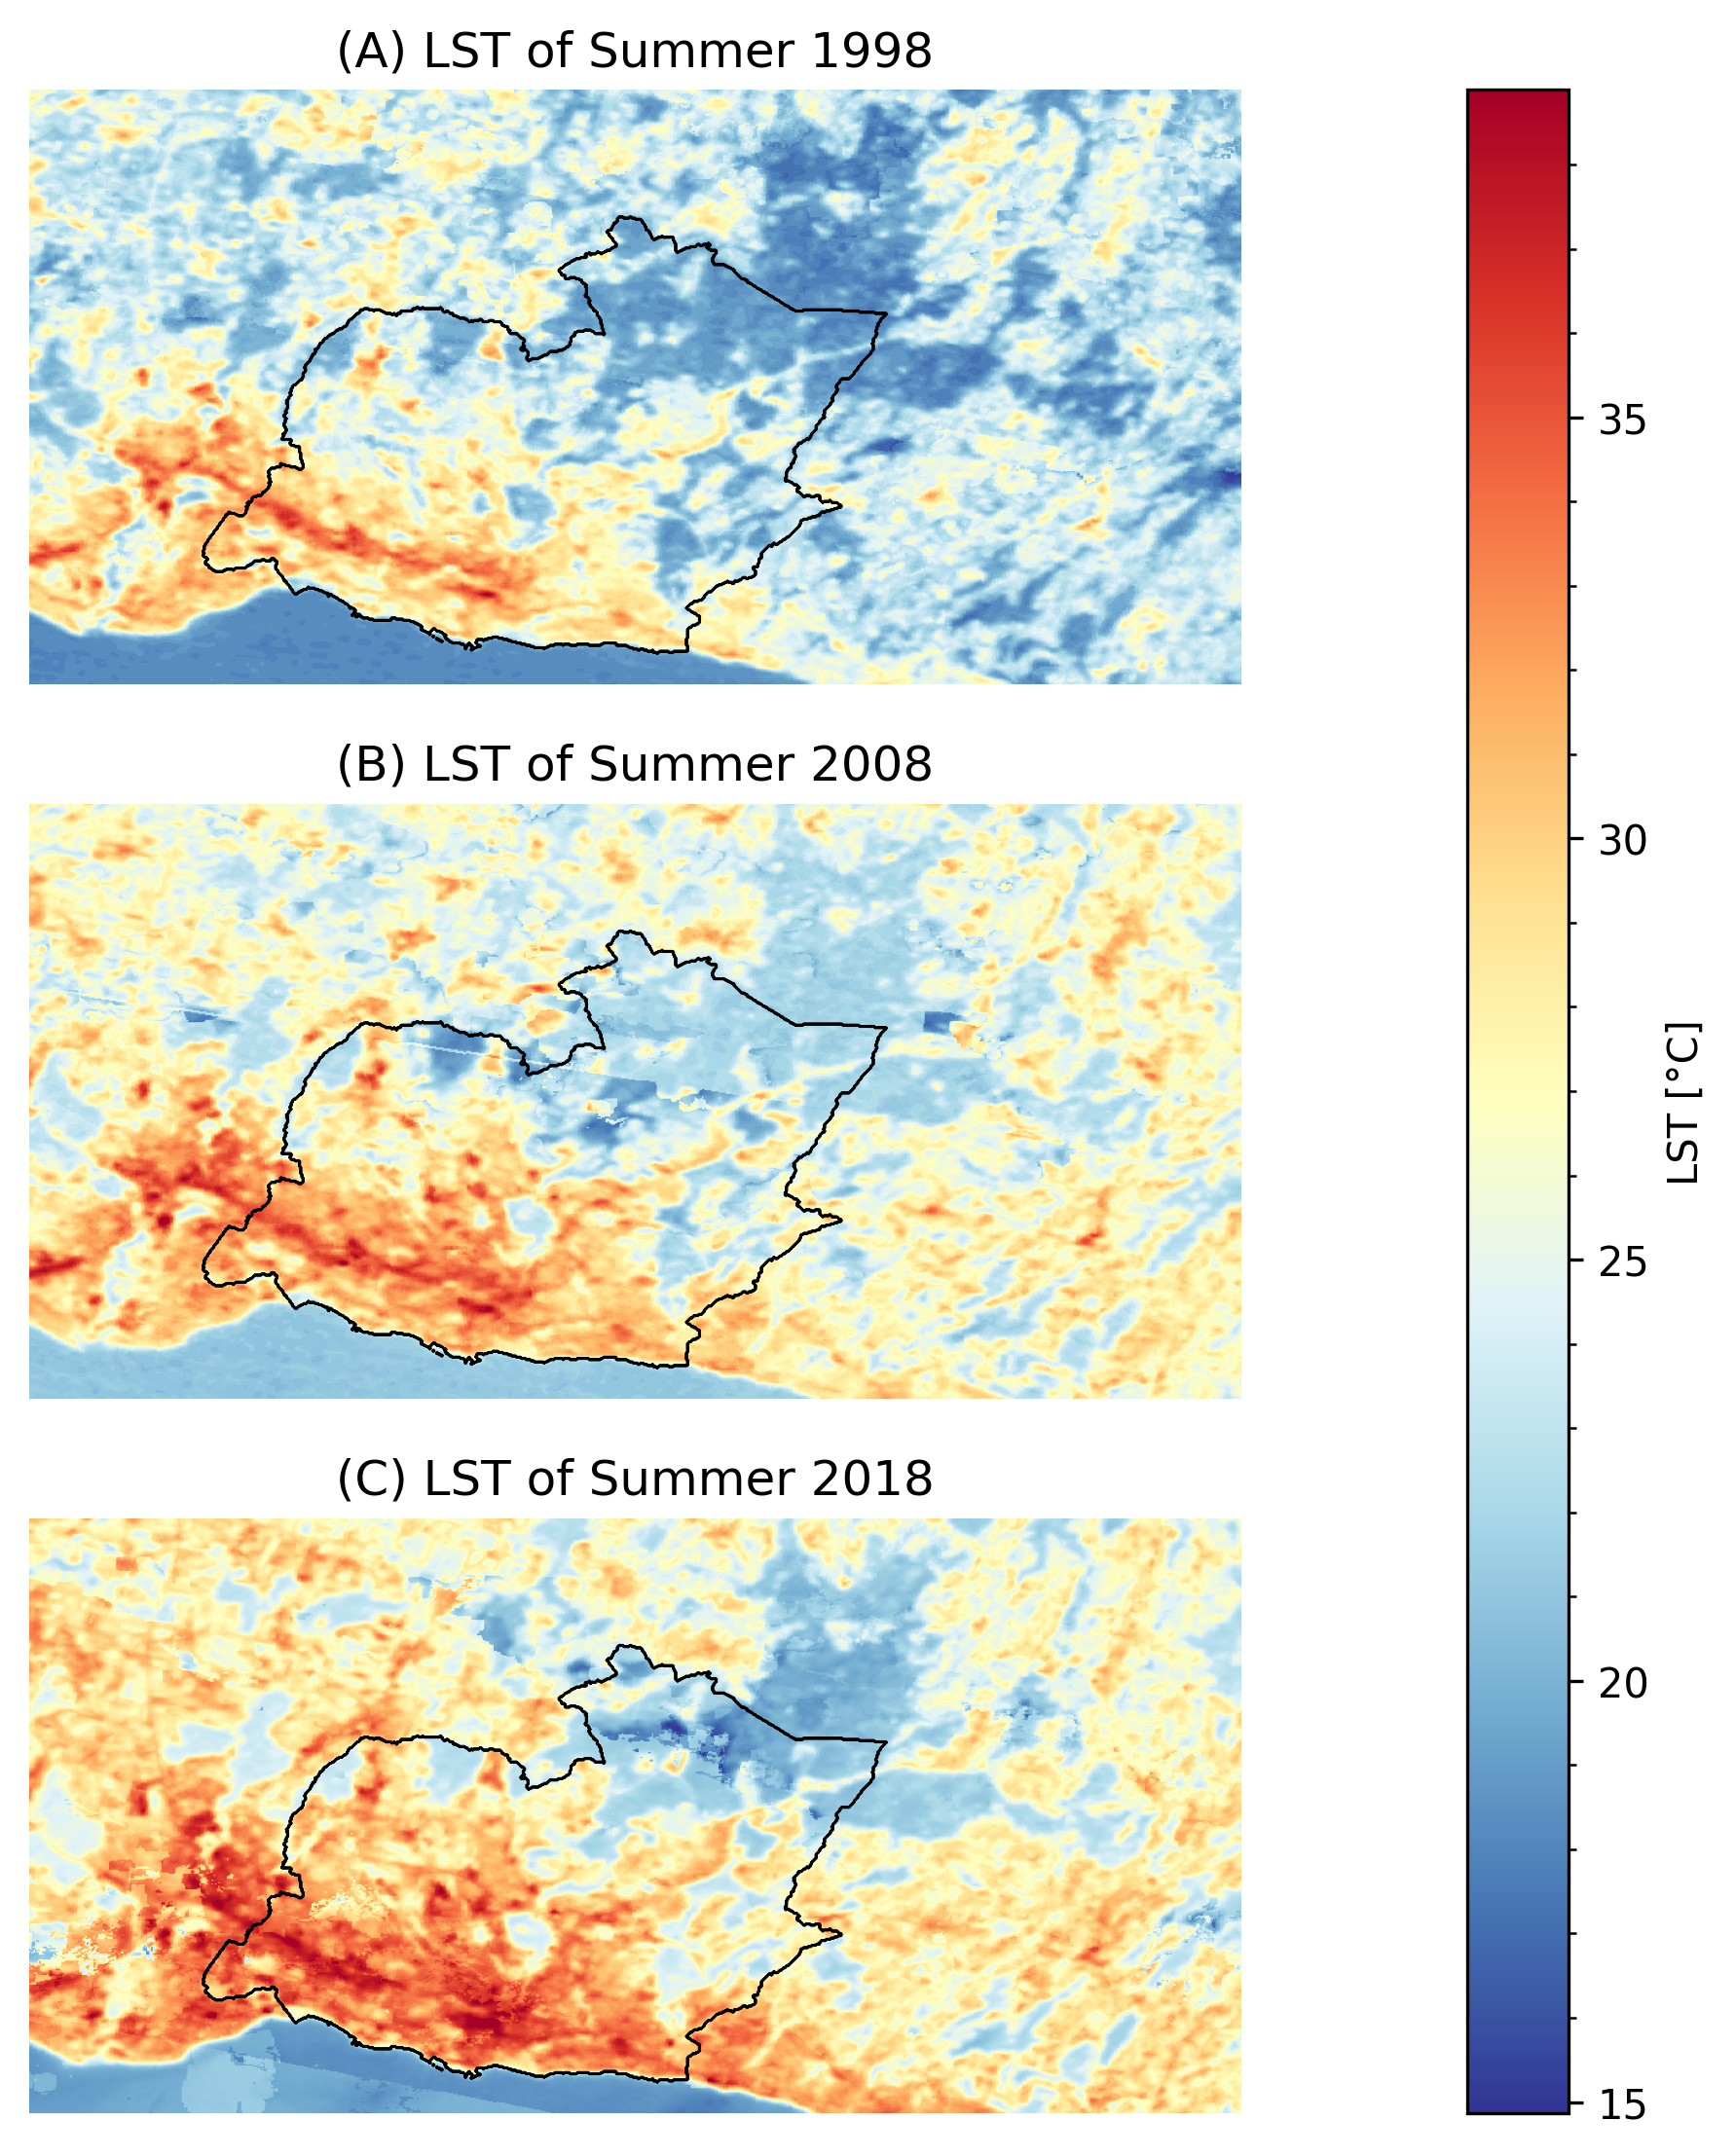

In [11]:
# Plot the LST data
fig, ax = plt.subplots(3, 1, figsize=(20, 9))
ax[0].imshow(lst98, cmap="RdYlBu_r", vmin=vmin, vmax=vmax)
ax[0].contour(out[0], colors="black", linewidths=0.5)
ax[1].imshow(lst08, cmap="RdYlBu_r", vmin=vmin, vmax=vmax)
ax[1].contour(out[0], colors="black", linewidths=0.5)
im = ax[2].imshow(lst18, cmap="RdYlBu_r", vmin=vmin, vmax=vmax)
ax[2].contour(out[0], colors="black", linewidths=0.5)

for i, a in enumerate(ax):
    a.set_axis_off()
    a.set_title(f"({string.ascii_uppercase[i]}) LST of Summer {years[i]}")
cb = fig.colorbar(im, ax=ax,) #orientation='horizontal', pad=0.05, aspect=50)
cb.set_label("LST [°C]")
cb.minorticks_on()
fig.savefig("figures/lst.png", bbox_inches="tight", dpi=600)

In [12]:
lausanne = gpd.read_file("data/Lausanne Region by municipalities.zip")
lausanne = lausanne.to_crs("EPSG:21781")

In [13]:
gdf = gpd.read_file("data/finalClean.gpkg")

In [14]:
colors = {0: "#bebdbe", 1: "#fe0000", 2: "#0000fe", 3: "#9696fe", 4: "#fe9695", 6: "#fe9695"}

In [15]:
# drop where column gaf_lisaCl = 6
gdf = gdf[gdf["gaf_lisaCl"] != 6]
gdf["gaf_lisaCl"] = pd.Categorical(gdf['gaf_lisaCl'], [1, 2, 3, 4, 0])
gdf = gdf.sort_values(by='gaf_lisaCl')

In [16]:
customs = [mlines.Line2D([], [], linewidth=0) ,mlines.Line2D([], [], color=colors[0], marker='o', linestyle='None', markersize=3), mlines.Line2D([], [], color=colors[1], marker='o', linestyle='None', markersize=3), mlines.Line2D([], [], color=colors[2], marker='o', linestyle='None', markersize=3), mlines.Line2D([], [], color=colors[3], marker='o', linestyle='None', markersize=3), mlines.Line2D([], [], color=colors[4], marker='o', linestyle='None', markersize=3)]

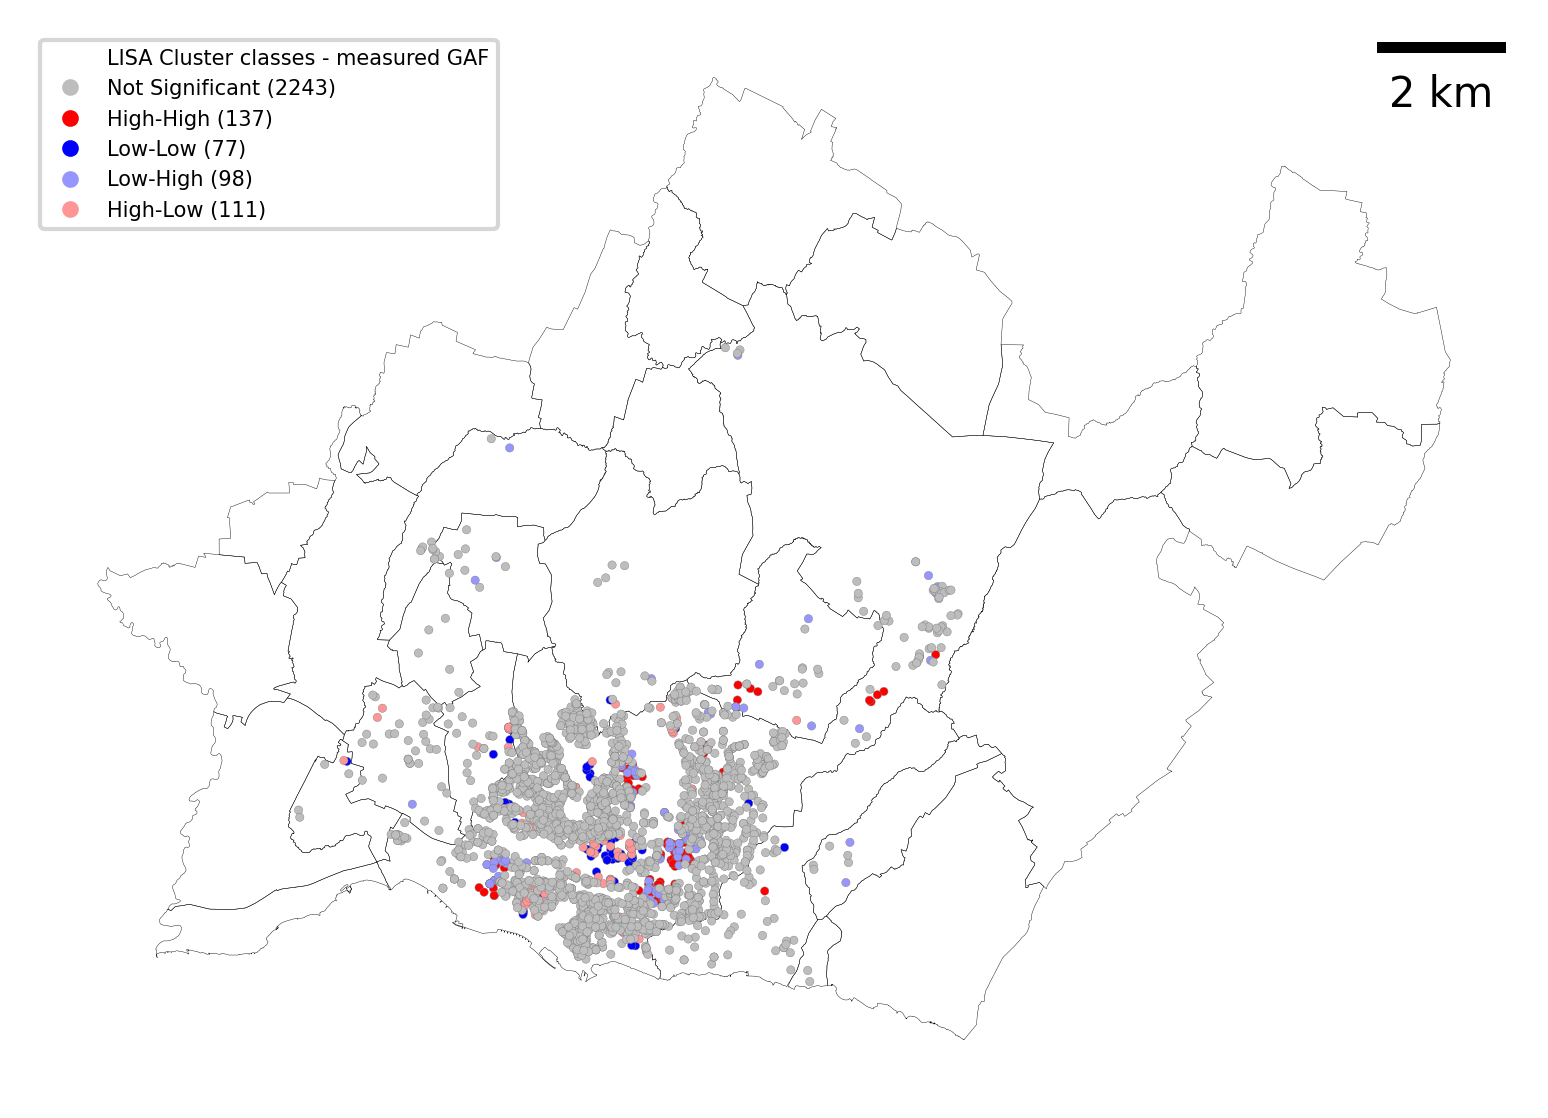

In [17]:
fig, ax = plt.subplots()
lausanne.plot(color="none", edgecolor="black", ax=ax, linewidth=0.1, facecolor="#778382")
handle = gdf.plot(marker='o', categorical=True, color=gdf["gaf_lisaCl"].map(colors), ax=ax, markersize=4, edgecolor="gray", linewidth=0.1, legend=True)
ax.set_axis_off()
ax.add_artist(ScaleBar(1))
ax.legend(customs, ['LISA Cluster classes - measured GAF', 'Not Significant (2243)', 'High-High (137)', 'Low-Low (77)', 'Low-High (98)', 'High-Low (111)'], prop={'size': 5}, loc=2)
fig.savefig("figures/gaf_lisa.pdf", bbox_inches="tight", dpi=600)

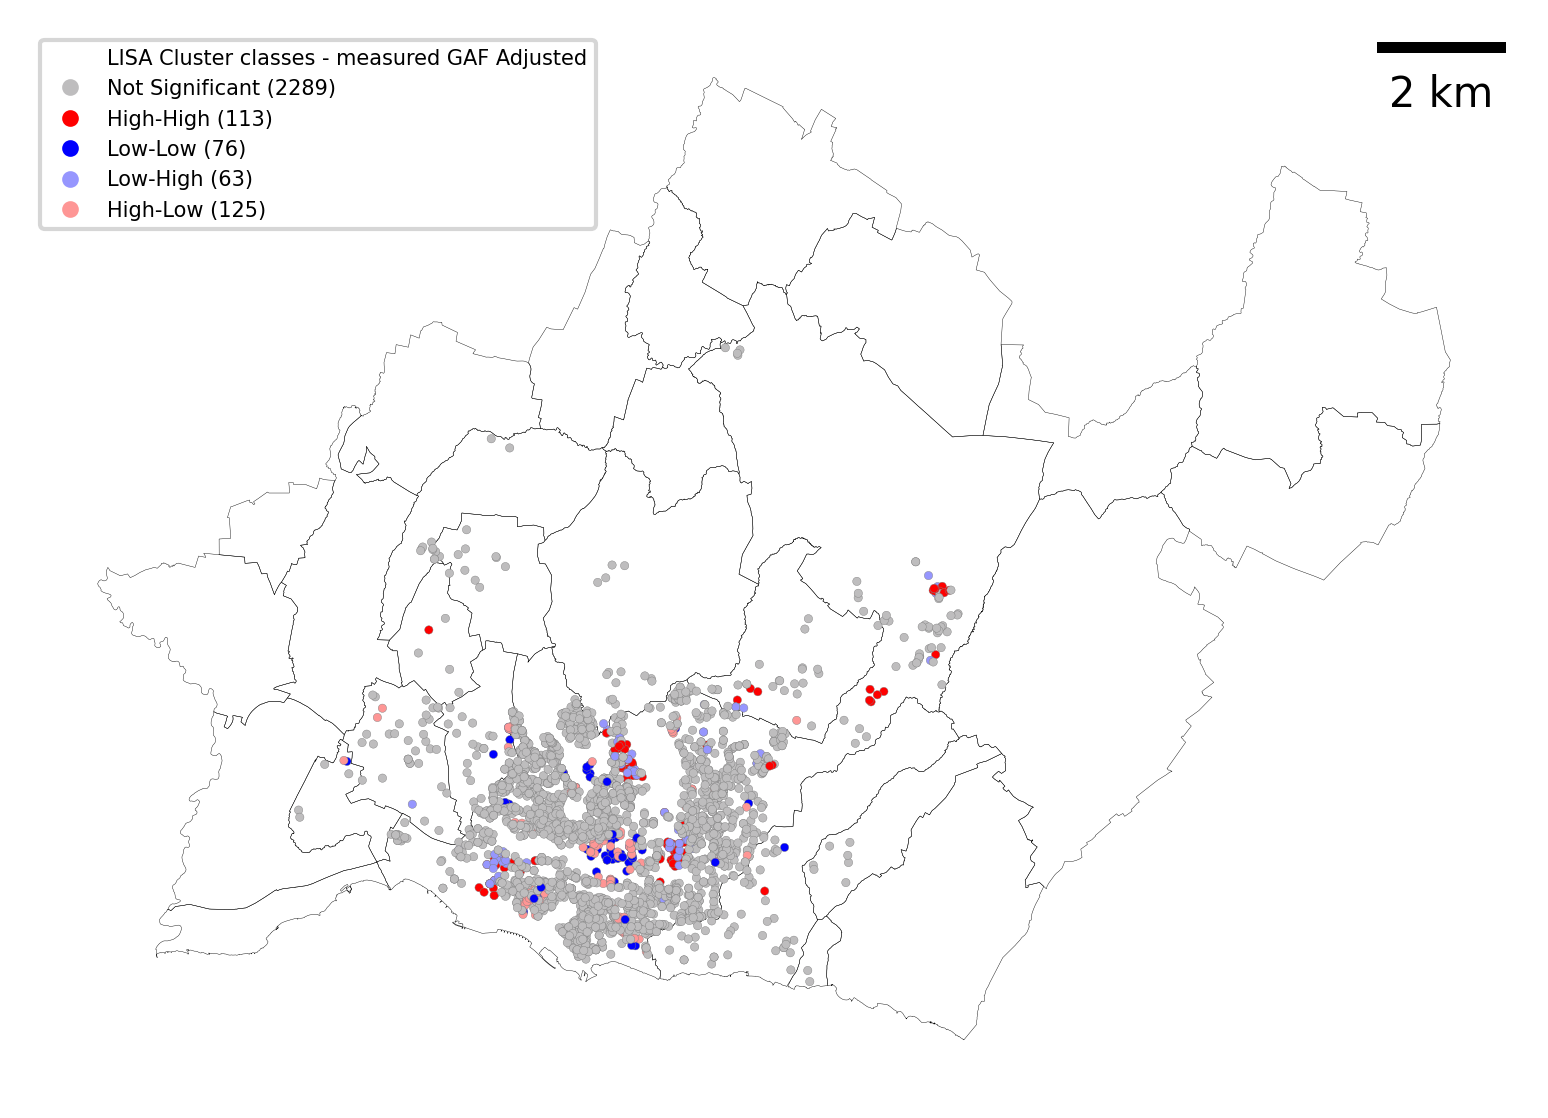

In [18]:
fig, ax = plt.subplots()
lausanne.plot(color="none", edgecolor="black", ax=ax, linewidth=0.1, facecolor="#778382")
handle = gdf.plot(marker='o', categorical=True, color=gdf["adjga_saCl"].map(colors), ax=ax, markersize=4, edgecolor="gray", linewidth=0.1, legend=True)
ax.set_axis_off()
ax.add_artist(ScaleBar(1))
ax.legend(customs, ['LISA Cluster classes - measured GAF Adjusted', 'Not Significant (2289)', 'High-High (113)', 'Low-Low (76)', 'Low-High (63)', 'High-Low (125)'], prop={'size': 5}, loc=2)
fig.savefig("figures/gaf_adj_lisa.pdf", bbox_inches="tight", dpi=600)